In [68]:
import pandas as pd
import glob
from natsort import natsorted
from tqdm import tqdm
import numpy as np
import re
import warnings
import os
warnings.filterwarnings('ignore')

## as we don't have individual masks for all subjects
## use time course of individual masks to replace those with common mask if they exists
## currently only for 6mm and 10mm individual masks
## 14mm masks added -Jan 25th 2023
## conn does not have data for NTS group so we just do HTHC and TEHC:

# seed time course with individual mask:
# input_dir_ind = "data_fmri_time_course_conn_indmask/"
input_dir_ind = "data_fmri_time_course_conn_indmask_old/"


# read fc time course with common mask:
input_dir = "data_fmri_time_course_conn_common_mask/"

# output_dir = "out03_functional_connectivity_conn_indmask/"
output_dir = "out03_functional_connectivity_conn_indmask_old/"


if not os.path.isdir(output_dir):
    os.mkdir(output_dir)

files_seed_ind = natsorted(
    glob.glob(input_dir_ind + "time_course_ind_????.txt") 
    #+ glob.glob(input_dir2 + "time_course_NTS*.txt")
)

files_seed = natsorted(
    glob.glob(input_dir + "time_course_??HC*.txt") 
    #+ glob.glob(input_dir2 + "time_course_NTS*.txt")
)

files_target = natsorted(
    glob.glob(input_dir + "time_course_target_??HC*.txt") 
    #+ glob.glob(input_dir2 + "time_course_target_NTS*.txt")
)

# get files with common subject id:
subject_id = \
    set([int(x[-8:-4]) for x in files_seed]
).intersection(
    set([int(x[-8:-4]) for x in files_seed_ind])
).intersection(
    set([int(x[-8:-4]) for x in files_target])
)

files_seed_ind = [x for x in files_seed_ind if int(x[-8:-4]) in subject_id]
files_seed = [x for x in files_seed if int(x[-8:-4]) in subject_id]
files_target = [x for x in files_target if int(x[-8:-4]) in subject_id]

df_connectivity = pd.DataFrame({
    'files_seed': files_seed,
    'files_target': files_target,
    'files_seed_ind': files_seed_ind,
    'subject_id': [int(x[-8:-4]) for x in files_seed],
    #'group': [re.findall("NTHC|NTS", x)[0] for x in files_seed],
    'group': ['HC' if int(x[-8:-4]) < 3000 else 'MDD' for x in files_seed],
})


seed_list = ['L_aMFG_10mm',  'L_aMFG_14mm', 
                 'L_aMFG_6mm',  'L_pMFG_10mm',  
                 'L_pMFG_14mm', 'L_pMFG_6mm',  'R_aMFG_10mm', 
                 'R_aMFG_14mm', 'R_aMFG_6mm',  'R_FEF_10mm',  
                 'R_FEF_14mm', 'R_FEF_6mm', 
                 'R_IFJ_10mm', 'R_IFJ_14mm', 
                 'R_IFJ_6mm', 'R_IPL_10mm', 'R_IPL_14mm', 'R_IPL_6mm', 
                 'R_M1_10mm', 'R_M1_14mm', 'R_M1_6mm', 'R_pMFG_10mm',
                 'R_pMFG_14mm', 'R_pMFG_6mm', 'R_preSMA_10mm',
                 'R_preSMA_14mm', 'R_preSMA_6mm']

# df1 = pd.read_csv(files_seed[0], sep = '\t')
# df1.pop(df1.columns[-1])
# seed_list = list(df1.columns)
# seed_list = ['_'.join(x.split('_')[1:]) for x in seed_list]

print(seed_list)

df2 = pd.read_csv(files_target[0], sep = '\t')
df2.pop(df2.columns[-1])
target_list = list(df2.columns)
target_list = ['_'.join(x.split('_')[1:]) for x in target_list]
target_list = [x.replace('.nii', '') for x in target_list]
print(target_list)

# add Left and right Fp to seed:
seed_list = ['L_Fp_6mm', 'R_Fp_6mm', 'L_Fp_10mm', 'R_Fp_10mm', 'L_Fp_14mm', 'R_Fp_14mm'] + seed_list
# seed_list = ['L_FP_6mm', 'R_FP_6mm', 'L_FP_10mm', 'R_FP_10mm', 'L_FP_14mm', 'R_FP_14mm'] + seed_list

# calculate pearson correlation between seed and target regions:
for seed in seed_list:    
    for target in target_list:
        col_label = seed + '*' + target
        df_connectivity[col_label] = np.nan
    

# select subjects identifed in script01_organize_subject_info:
df_life_time_mdd = pd.read_csv('out02_img_file_info_mdd_tms_response.csv')

# df_nthc = pd.read_csv('out02_img_file_info_nthc_tms_response.csv')
# df_nthc = pd.read_csv('out02_img_file_info_nthc_tms_response_zscore.csv')
df_hc = pd.read_csv('out02_img_file_info_tms_response_zscore_gm.3.csv')

subject_selected = list(df_hc['subject_id'].unique()) + list(df_life_time_mdd['subject_id'])
df_connectivity  = df_connectivity.loc[df_connectivity['subject_id'].isin(subject_selected), :]
# df_connectivity



['L_aMFG_10mm', 'L_aMFG_14mm', 'L_aMFG_6mm', 'L_pMFG_10mm', 'L_pMFG_14mm', 'L_pMFG_6mm', 'R_aMFG_10mm', 'R_aMFG_14mm', 'R_aMFG_6mm', 'R_FEF_10mm', 'R_FEF_14mm', 'R_FEF_6mm', 'R_IFJ_10mm', 'R_IFJ_14mm', 'R_IFJ_6mm', 'R_IPL_10mm', 'R_IPL_14mm', 'R_IPL_6mm', 'R_M1_10mm', 'R_M1_14mm', 'R_M1_6mm', 'R_pMFG_10mm', 'R_pMFG_14mm', 'R_pMFG_6mm', 'R_preSMA_10mm', 'R_preSMA_14mm', 'R_preSMA_6mm']
['dACC_10mm', 'dACC_6mm', 'FIRST_B_amyg_small', 'FIRST_L_amyg_small', 'FIRST_R_amyg_small', 'l-dACC_2mm_mask', 'r-dACC_2mm_mask', 'sgACC_6_16_-10_10mm']


In [69]:
df_connectivity.head()

,files_seed,files_target,files_seed_ind,subject_id,group,L_Fp_6mm*dACC_10mm,L_Fp_6mm*dACC_6mm,L_Fp_6mm*FIRST_B_amyg_small,L_Fp_6mm*FIRST_L_amyg_small,L_Fp_6mm*FIRST_R_amyg_small,...,R_preSMA_14mm*r-dACC_2mm_mask,R_preSMA_14mm*sgACC_6_16_-10_10mm,R_preSMA_6mm*dACC_10mm,R_preSMA_6mm*dACC_6mm,R_preSMA_6mm*FIRST_B_amyg_small,R_preSMA_6mm*FIRST_L_amyg_small,R_preSMA_6mm*FIRST_R_amyg_small,R_preSMA_6mm*l-dACC_2mm_mask,R_preSMA_6mm*r-dACC_2mm_mask,R_preSMA_6mm*sgACC_6_16_-10_10mm
0,data_fmri_time_course_conn_common_mask/time_co...,data_fmri_time_course_conn_common_mask/time_co...,data_fmri_time_course_conn_indmask_old/time_co...,1001,HC,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,data_fmri_time_course_conn_common_mask/time_co...,data_fmri_time_course_conn_common_mask/time_co...,data_fmri_time_course_conn_indmask_old/time_co...,1003,HC,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,data_fmri_time_course_conn_common_mask/time_co...,data_fmri_time_course_conn_common_mask/time_co...,data_fmri_time_course_conn_indmask_old/time_co...,1009,HC,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,data_fmri_time_course_conn_common_mask/time_co...,data_fmri_time_course_conn_common_mask/time_co...,data_fmri_time_course_conn_indmask_old/time_co...,1015,HC,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,data_fmri_time_course_conn_common_mask/time_co...,data_fmri_time_course_conn_common_mask/time_co...,data_fmri_time_course_conn_indmask_old/time_co...,1016,HC,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
# delete empty files in the input folder: input_dir_ind to run this chunck:
col1_selected = ['L_aMFG_10mm',  'L_aMFG_14mm', 
                 'L_aMFG_6mm',  'L_pMFG_10mm',  
                 'L_pMFG_14mm', 'L_pMFG_6mm',  'R_aMFG_10mm', 
                 'R_aMFG_14mm', 'R_aMFG_6mm',  'R_FEF_10mm',  
                 'R_FEF_14mm', 'R_FEF_6mm', 
                 'R_IFJ_10mm', 'R_IFJ_14mm', 
                 'R_IFJ_6mm', 'R_IPL_10mm', 'R_IPL_14mm', 'R_IPL_6mm', 
                 'R_M1_10mm', 'R_M1_14mm', 'R_M1_6mm', 'R_pMFG_10mm',
                 'R_pMFG_14mm', 'R_pMFG_6mm', 'R_preSMA_10mm',
                 'R_preSMA_14mm', 'R_preSMA_6mm']

for i in tqdm(range(len(df_connectivity.index))):
    
    df1 = pd.read_csv(df_connectivity.iloc[i, 0], sep = '\t')
    df1.pop(df1.columns[-1])
    col_list = list(df1.columns)
    df1.columns = ['_'.join(x.split('_')[1:]) for x in col_list]
    df1 = df1[col1_selected]
    
    df2 = pd.read_csv(df_connectivity.iloc[i, 1], sep = '\t')
    df2.pop(df2.columns[-1])
    col_list = list(df2.columns)
    col_list = ['_'.join(x.split('_')[1:]) for x in col_list]
    col_list = [x.replace('.nii', '') for x in col_list]
    df2.columns = col_list
    
    #print(df_connectivity.iloc[i, 2])
    df3 = pd.read_csv(df_connectivity.iloc[i, 2], sep = '\t')
    df3.pop(df3.columns[-1])
    col_list = list(df3.columns)
    col_list = ['_'.join(x.split('_')[1:]) for x in col_list]
    # fix the mismatch of column names of individual seed:
    col_list = [x.replace('-', '_', 1) for x in col_list]
    df3.columns = col_list
    
    
    corr = []
    
    for seed_target in list(df_connectivity.columns)[5:]:
        seed = seed_target.split('*')[0]
        target = seed_target.split('*')[1]

        if seed in df3 and all(df3[seed].values != 0):
            corr.append(np.corrcoef(df3[seed].values, df2[target].values)[0][1])
        elif seed in df1:
            corr.append(np.corrcoef(df1[seed].values, df2[target].values)[0][1])
        else:
            corr.append(np.nan)
        
    df_connectivity.iloc[i, 5:] = corr
    
#     break
df_connectivity.to_csv(output_dir + 'out03_functional_connectivity.csv', index = None)


100%|███████████████████████████████████████████| 73/73 [00:05<00:00, 13.91it/s]


In [71]:
df_connectivity

,files_seed,files_target,files_seed_ind,subject_id,group,L_Fp_6mm*dACC_10mm,L_Fp_6mm*dACC_6mm,L_Fp_6mm*FIRST_B_amyg_small,L_Fp_6mm*FIRST_L_amyg_small,L_Fp_6mm*FIRST_R_amyg_small,...,R_preSMA_14mm*r-dACC_2mm_mask,R_preSMA_14mm*sgACC_6_16_-10_10mm,R_preSMA_6mm*dACC_10mm,R_preSMA_6mm*dACC_6mm,R_preSMA_6mm*FIRST_B_amyg_small,R_preSMA_6mm*FIRST_L_amyg_small,R_preSMA_6mm*FIRST_R_amyg_small,R_preSMA_6mm*l-dACC_2mm_mask,R_preSMA_6mm*r-dACC_2mm_mask,R_preSMA_6mm*sgACC_6_16_-10_10mm
0,data_fmri_time_course_conn_common_mask/time_co...,data_fmri_time_course_conn_common_mask/time_co...,data_fmri_time_course_conn_indmask_old/time_co...,1001,HC,0.234146,0.228998,-0.125465,-0.141468,-0.065309,...,0.397969,-0.076319,0.001888,-0.004382,0.047947,0.058444,0.021170,0.248844,0.413411,-0.120489
1,data_fmri_time_course_conn_common_mask/time_co...,data_fmri_time_course_conn_common_mask/time_co...,data_fmri_time_course_conn_indmask_old/time_co...,1003,HC,0.152435,0.122085,0.295696,0.341298,0.214226,...,0.171221,-0.268232,0.097649,0.083379,0.152144,0.080677,0.174734,-0.127002,0.079903,-0.204967
2,data_fmri_time_course_conn_common_mask/time_co...,data_fmri_time_course_conn_common_mask/time_co...,data_fmri_time_course_conn_indmask_old/time_co...,1009,HC,NaN,NaN,NaN,NaN,NaN,...,0.065438,-0.162466,-0.429917,-0.386728,0.092395,0.160955,0.019134,-0.077458,-0.154097,-0.123607
3,data_fmri_time_course_conn_common_mask/time_co...,data_fmri_time_course_conn_common_mask/time_co...,data_fmri_time_course_conn_indmask_old/time_co...,1015,HC,NaN,NaN,NaN,NaN,NaN,...,0.136050,-0.215604,0.337038,0.360153,-0.170539,-0.195101,-0.140427,-0.382518,-0.202776,-0.328100
4,data_fmri_time_course_conn_common_mask/time_co...,data_fmri_time_course_conn_common_mask/time_co...,data_fmri_time_course_conn_indmask_old/time_co...,1016,HC,NaN,NaN,NaN,NaN,NaN,...,0.301871,0.191281,-0.013134,-0.125039,-0.007310,0.071281,-0.086466,0.359529,0.357799,0.206755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,data_fmri_time_course_conn_common_mask/time_co...,data_fmri_time_course_conn_common_mask/time_co...,data_fmri_time_course_conn_indmask_old/time_co...,2102,HC,0.044612,0.027679,0.052242,0.088756,0.020189,...,-0.002508,0.011632,-0.097512,-0.068439,0.021834,-0.004571,0.040328,-0.246383,0.024620,0.023742
69,data_fmri_time_course_conn_common_mask/time_co...,data_fmri_time_course_conn_common_mask/time_co...,data_fmri_time_course_conn_indmask_old/time_co...,2103,HC,-0.292651,-0.313870,-0.117252,-0.043425,-0.106987,...,0.095696,0.137200,0.282565,0.287686,-0.116183,-0.101638,-0.089206,-0.232015,-0.146506,0.191901
70,data_fmri_time_course_conn_common_mask/time_co...,data_fmri_time_course_conn_common_mask/time_co...,data_fmri_time_course_conn_indmask_old/time_co...,2104,HC,-0.405967,-0.398091,-0.221612,-0.183986,-0.202982,...,0.513280,-0.102970,0.243973,0.228854,0.035503,0.024816,0.036839,-0.315482,0.484878,-0.105143
71,data_fmri_time_course_conn_common_mask/time_co...,data_fmri_time_course_conn_common_mask/time_co...,data_fmri_time_course_conn_indmask_old/time_co...,2105,HC,-0.196030,-0.186016,0.005234,-0.233392,0.169687,...,-0.059493,0.005302,-0.084545,-0.070605,0.122513,-0.023821,0.197644,-0.142541,0.001039,0.078500


In [72]:
# fisher z transform FC (pearson's correlation)

# import re
import pandas as pd

df_connectivity = pd.read_csv(output_dir + 'out03_functional_connectivity.csv')

def fisher_z(r):
    return .5*(np.log(1+r) - np.log(1-r))

fc_cols = [x for x in df_connectivity.columns if re.search('-', x)]
for col in fc_cols:
    df_connectivity[col] = fisher_z(df_connectivity[col].values)
    

df_connectivity.drop(columns = ['files_seed', 'files_target', 'files_seed_ind'], inplace = True)
df_connectivity.to_csv(output_dir + 'out03_functional_connectivity_z.csv', index = None)
df_connectivity.describe()


,subject_id,L_Fp_6mm*dACC_10mm,L_Fp_6mm*dACC_6mm,L_Fp_6mm*FIRST_B_amyg_small,L_Fp_6mm*FIRST_L_amyg_small,L_Fp_6mm*FIRST_R_amyg_small,L_Fp_6mm*l-dACC_2mm_mask,L_Fp_6mm*r-dACC_2mm_mask,L_Fp_6mm*sgACC_6_16_-10_10mm,R_Fp_6mm*dACC_10mm,...,R_preSMA_14mm*r-dACC_2mm_mask,R_preSMA_14mm*sgACC_6_16_-10_10mm,R_preSMA_6mm*dACC_10mm,R_preSMA_6mm*dACC_6mm,R_preSMA_6mm*FIRST_B_amyg_small,R_preSMA_6mm*FIRST_L_amyg_small,R_preSMA_6mm*FIRST_R_amyg_small,R_preSMA_6mm*l-dACC_2mm_mask,R_preSMA_6mm*r-dACC_2mm_mask,R_preSMA_6mm*sgACC_6_16_-10_10mm
count,73.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,...,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000
mean,1490.369863,0.084924,0.069148,-0.042599,-0.042218,-0.037499,-0.106484,-0.105464,0.072407,0.126982,...,0.134279,-0.074269,0.038204,0.041497,0.045740,0.042978,0.039449,-0.048032,0.074033,-0.067722
std,503.066334,0.230629,0.225367,0.182718,0.194698,0.168919,0.209454,0.224512,0.197831,0.238658,...,0.223598,0.183451,0.202885,0.197691,0.167095,0.172593,0.168604,0.239374,0.261638,0.194672
min,1001.000000,-0.405967,-0.398091,-0.475204,-0.440184,-0.505893,-0.822701,-0.798014,-0.484116,-0.337364,...,-0.258542,-0.512046,-0.430540,-0.424534,-0.379749,-0.362710,-0.341672,-0.611665,-0.642657,-0.525049
25%,1040.000000,-0.067797,-0.099026,-0.173750,-0.176920,-0.133659,-0.228963,-0.247665,-0.024236,-0.036962,...,-0.017558,-0.189006,-0.095143,-0.091201,-0.042830,-0.101638,-0.040838,-0.251558,-0.139699,-0.178247
50%,1101.000000,0.088858,0.075307,-0.038551,-0.056481,-0.026444,-0.095369,-0.045108,0.074355,0.084090,...,0.091045,-0.076467,0.044461,0.051992,0.056284,0.058444,0.040328,-0.034092,0.049699,-0.088619
75%,2044.000000,0.236443,0.208844,0.076869,0.107901,0.081146,0.043039,0.033999,0.197637,0.300416,...,0.303886,0.032920,0.157478,0.187109,0.148865,0.161143,0.166554,0.118354,0.285448,0.068045
max,2108.000000,0.559532,0.524269,0.295696,0.341298,0.286010,0.271288,0.302882,0.648608,0.656376,...,0.630706,0.379545,0.523762,0.484768,0.388015,0.434278,0.427080,0.458960,0.715888,0.464163


In [74]:
# ttest:
df_connectivity = pd.read_csv(output_dir + 'out03_functional_connectivity_z.csv')
# df_connectivity_long = pd.wide_to_long(df_connectivity, target_list, i="id", j="year")

from scipy.stats import ttest_ind
from scipy.stats import ttest_1samp
import numpy as np

def format_table(report):
    report2 = report.copy()
    report2[report.gt(0)] = report2[report.gt(0)].astype(str).apply(lambda x : x.str[:5])
    report2[report.lt(0)] = report2[report.lt(0)].astype(str).apply(lambda x : x.str[:6])
    
    report_pvalue = report2.iloc[1::3,:]
    report_pvalue[report.iloc[1::3,:].le(0.05)] = \
    report_pvalue[report.iloc[1::3,:].le(0.05)].apply(lambda x : x.str[:5]).add('*')

    report_pvalue = report2.iloc[1::3,:]
    report_pvalue[report.iloc[1::3,:].le(0.01)] = \
    report_pvalue[report.iloc[1::3,:].le(0.01)].apply(lambda x : x.str[:5]).add('**')
    
    report_pvalue = report2.iloc[1::3,:]
    report_pvalue[report.iloc[1::3,:].le(0.001)] = '<.001***'
        
    return report2

# ['dACC_10mm', 'dACC_6mm', 'FIRST_B_amyg_small', 'FIRST_L_amyg_small', 'FIRST_R_amyg_small', 
#  'l-dACC_2mm_mask', 'r-dACC_2mm_mask', 'sgACC_6_16_-10_10mm']

target_list = ['dACC_10mm', 'dACC_6mm', 'sgACC_6_16_-10_10mm', 
               'l-dACC_2mm_mask', 'r-dACC_2mm_mask',
               'FIRST_L_amyg_small', 'FIRST_R_amyg_small']
# target_list = ['sgACC_6_16_-10', 'FIRST_B_amyg', 'FIRST_L_amyg', 'FIRST_R_amyg']
mask = '_14mm\*'

test_variables = []
for seed in target_list:
    test_variables += [x for x in df_connectivity.columns if re.search(mask, x) and re.search(seed, x)]

row_index = pd.MultiIndex.from_tuples([(i , j) for i in target_list for j in ['t value', 'p value', "Cohen's d"]])

col = ['L_FP', 'R_FP', 'L_aMFG','R_aMFG', 'L_pMFG', 'R_pMFG', 'R_IFJ', 'R_FEF', 'R_M1', 'R_preSMA', 'R_IPL']
result = pd.DataFrame(index = row_index, 
#                       columns = list(set([x.split('-')[0] for x in test_variables]),
                     columns = col)

result_hc = result.copy()

# statistical tests for each roi and roi setting:
for var in test_variables:
        
    seed = var.split('*')[1]
    target = var.split('*')[0]
    target = '_'.join(target.split('_')[:2])
    
    hc = df_connectivity.loc[(df_connectivity['group']=='HC'), var].values
    hc = hc[~np.isnan(hc)]
    mdd = df_connectivity.loc[(df_connectivity['group']=='MDD') & (~df_connectivity[var].isna()), var].values
    mdd = mdd[~np.isnan(mdd)]
    
    t, p = ttest_ind(hc, mdd)
    cohend = (np.mean(hc) - np.mean(mdd)) / (np.sqrt((np.std(hc) ** 2 + np.std(mdd) ** 2) / 2))
    result.loc[(seed, 't value'), target] = t
    result.loc[(seed, 'p value'), target] = p
    result.loc[(seed, "Cohen's d"), target] = cohend
    
    t, p = ttest_1samp(hc, popmean=0)
    cohend = np.mean(hc) / np.std(hc)
    result_hc.loc[(seed, 't value'), target] = t
    result_hc.loc[(seed, 'p value'), target] = p
    result_hc.loc[(seed, "Cohen's d"), target] = cohend
    

# save results separately for each roi setting:
# for var in test_variables:
#     result.loc[(tms, ['t value', 'p value', "Cohen's d"]), :].to_csv(out_file_prefix + 'response_' + var + '.csv')

# result = format_table(result)
# result.to_csv('out03_ttest' + mask + '.csv')
# result.loc[(seed_list, ['p value', "Cohen's d"]), :]

# result_hc = format_table(result_hc)
result_hc.to_csv('out03_ttest_hc' + mask + '.csv')
result_hc.loc[(target_list, ['p value', "Cohen's d"]), :]

# result_hc

L_FP R_FP    L_aMFG    R_aMFG    L_pMFG  \
dACC_10mm           p value    NaN  NaN       0.0       0.0  0.000023   
                    Cohen's d  NaN  NaN  1.499957  1.941875   0.53368   
dACC_6mm            p value    NaN  NaN       0.0       0.0  0.001065   
                    Cohen's d  NaN  NaN  1.511824  2.080947  0.401967   
sgACC_6_16_-10_10mm p value    NaN  NaN  0.007888  0.000117  0.055914   
                    Cohen's d  NaN  NaN -0.322108 -0.480137 -0.228996   
l-dACC_2mm_mask     p value    NaN  NaN       0.0       0.0       0.0   
                    Cohen's d  NaN  NaN -0.661047 -1.126516 -1.263444   
r-dACC_2mm_mask     p value    NaN  NaN       0.0       0.0       0.0   
                    Cohen's d  NaN  NaN -0.861075 -1.457245  -1.43934   
FIRST_L_amyg_small  p value    NaN  NaN  0.008745       0.0  0.000657   
                    Cohen's d  NaN  NaN -0.317658 -0.694883 -0.419782   
FIRST_R_amyg_small  p value    NaN  NaN  0.000005  0.000013       0.0   
                    Cohen's d  NaN  NaN -0.579415 -0.550647  -0.86494   

                                 R_pMFG     R_IFJ     R_FEF      R_M1  \
dACC_10mm           p value         0.0  0.594391  0.009896       0.0   
                    Cohen's d  0.728199 -0.063034  0.312273 -1.057018   
dACC_6mm            p value         0.0   0.74991  0.004883       0.0   
                    Cohen's d  0.716009  -0.03771  0.342287 -1.108492   
sgACC_6_16_-10_10mm p value    0.000624  0.000007  0.000003  0.117737   
                    Cohen's d -0.421692 -0.570927 -0.593089  0.186593   
l-dACC_2mm_mask     p value         0.0  0.177475  0.000546       0.0   
                    Cohen's d -1.048288  0.160502 -0.426517  1.901045   
r-dACC_2mm_mask     p value         0.0   0.24262  0.000031       0.0   
                    Cohen's d -1.520469  0.138845 -0.524346  2.379221   
FIRST_L_amyg_small  p value    0.000036  0.001585  0.000005       0.0   
                    Cohen's d -0.519512  0.386958 -0.580543  1.043549   
FIRST_R_amyg_small  p value    0.000183  0.000227  0.032711       0.0   
                    Cohen's d  -0.46497  0.457576 -0.256636  1.079663   

                               R_preSMA     R_IPL  L_Fp  R_Fp  
dACC_10mm           p value    0.083475       0.0   NaN   NaN  
                    Cohen's d  0.206855  1.504365   NaN   NaN  
dACC_6mm            p value    0.063459       0.0   NaN   NaN  
                    Cohen's d  0.222155  1.365957   NaN   NaN  
sgACC_6_16_-10_10mm p value    0.000915  0.482367   NaN   NaN  
                    Cohen's d -0.407642  0.083222   NaN   NaN  
l-dACC_2mm_mask     p value    0.195596       0.0   NaN   NaN  
                    Cohen's d -0.153953 -1.090171   NaN   NaN  
r-dACC_2mm_mask     p value    0.000002       0.0   NaN   NaN  
                    Cohen's d  0.604694 -1.574113   NaN   NaN  
FIRST_L_amyg_small  p value    0.001371       0.0   NaN   NaN  
                    Cohen's d  0.392481 -0.924002   NaN   NaN  
FIRST_R_amyg_small  p value    0.006063  0.000004   NaN   NaN  
                    Cohen's d  0.333278 -0.587293   NaN   NaN

In [75]:
df_connectivity = pd.read_csv(output_dir + 'out03_functional_connectivity_z.csv', )

# add mean response of amygdala (of current resting state data) to dataframe:
# roi_name = ["FIRST_B_amyg_small", "FIRST_L_amyg_small", "FIRST_R_amyg_small"]
# roi_index= [0, 1, 2]

# for idx, name in zip(roi_index, roi_name):
#     mean_response = []
#     for i, f in enumerate(df_connectivity['files_target']):
#         df2 = pd.read_csv(files_target[0], sep = '\t')
#         df2.pop(df2.columns[-1])
#         mean_response.append(df2.iloc[i,:].mean())
        
#     df_connectivity[name] = mean_response

# add tms induced responsed in amygdala (of tms session) to dataframe:


col = [
#     "FSL_R_Amy_thr40",
#     "ROI_R_Amy_Com_MNI",
    "FIRST_R_amyg_small",
#     "ROI_B_Amy_Com_MNI",
#     "FSL_L_Amy_thr40",
    "FIRST_B_amyg_small",
#     "FSL_B_Amy_thr40",
#     "ROI_L_Amy_Com_MNI",
    "FIRST_L_amyg_small",
    "sgACC_6_16_-10_10mm",
    'dACC_10mm', 
    'dACC_6mm',
    'l-dACC_2mm_mask', 
    'r-dACC_2mm_mask',
]

### select response data set:
tms_response_hc = pd.read_csv("out02_img_file_info_hc_tms_response.csv")
# tms_response_hc = pd.read_csv('out02_img_file_info_tms_response_zscore_gm.3.csv')

tms_response_mdd = pd.read_csv("out02_img_file_info_mdd_tms_response.csv")

tms_response = pd.concat([tms_response_hc, tms_response_mdd], axis = 0, keys = ['HC', 'MDD'])
# tms_response.reset_index(level = 0, inplace = True, names = 'group')
tms_response.reset_index(level = 0, inplace = True)
tms_response.rename(columns = {'level_0': 'group'}, inplace = True)
tms_response = tms_response[['subject_id', 'site'] + col]

df_connectivity_merge = df_connectivity.merge(tms_response, on = 'subject_id', how = 'inner')
df_connectivity_merge


,subject_id,group,L_Fp_6mm*dACC_10mm,L_Fp_6mm*dACC_6mm,L_Fp_6mm*FIRST_B_amyg_small,L_Fp_6mm*FIRST_L_amyg_small,L_Fp_6mm*FIRST_R_amyg_small,L_Fp_6mm*l-dACC_2mm_mask,L_Fp_6mm*r-dACC_2mm_mask,L_Fp_6mm*sgACC_6_16_-10_10mm,...,R_preSMA_6mm*sgACC_6_16_-10_10mm,site,FIRST_R_amyg_small,FIRST_B_amyg_small,FIRST_L_amyg_small,sgACC_6_16_-10_10mm,dACC_10mm,dACC_6mm,l-dACC_2mm_mask,r-dACC_2mm_mask
0,1001,HC,0.234146,0.228998,-0.125465,-0.141468,-0.065309,-0.093261,0.025692,-0.074961,...,-0.121077,L_pMFG,-0.204406,-0.240711,-0.280750,-0.343636,-0.655346,-0.606325,-0.000419,-0.126236
1,1001,HC,0.234146,0.228998,-0.125465,-0.141468,-0.065309,-0.093261,0.025692,-0.074961,...,-0.121077,R_M1,-2.610159,-2.152312,-1.647371,-0.081863,-0.985602,-1.034609,-0.170274,-0.750026
2,1001,HC,0.234146,0.228998,-0.125465,-0.141468,-0.065309,-0.093261,0.025692,-0.074961,...,-0.121077,R_pMFG,-0.718149,-0.796545,-0.883004,-0.502097,-1.199960,-1.345277,-0.333291,-0.760314
3,1001,HC,0.234146,0.228998,-0.125465,-0.141468,-0.065309,-0.093261,0.025692,-0.074961,...,-0.121077,R_aMFG,-1.042842,-0.762262,-0.452823,0.715525,-0.059356,-0.147028,-0.201857,-0.375180
4,1003,HC,0.152435,0.122085,0.295696,0.341298,0.214226,-0.300808,-0.463683,0.040709,...,-0.207912,L_pMFG,-0.378541,-0.254477,-0.117653,-0.529444,-0.130265,-0.113905,-0.111442,-0.344224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1108,HC,-0.092375,-0.120765,0.271237,0.281979,0.244212,-0.051514,-0.249589,-0.019825,...,0.309732,L_pMFG,-0.188161,-0.459643,-0.759049,-0.130635,-0.585520,-0.650087,0.257078,1.021470
196,1108,HC,-0.092375,-0.120765,0.271237,0.281979,0.244212,-0.051514,-0.249589,-0.019825,...,0.309732,L_aMFG,-0.961125,-1.193334,-1.449428,-0.082795,0.146148,0.119701,-0.491839,-0.975667
197,1108,HC,-0.092375,-0.120765,0.271237,0.281979,0.244212,-0.051514,-0.249589,-0.019825,...,0.309732,R_M1,-0.354299,-0.392541,-0.434715,-0.271843,-0.205288,-0.293661,-0.179933,-0.665205
198,1108,HC,-0.092375,-0.120765,0.271237,0.281979,0.244212,-0.051514,-0.249589,-0.019825,...,0.309732,R_pMFG,0.165889,0.101048,0.029538,-0.359279,0.302423,0.299222,-0.051744,-0.376901


In [76]:
# correlation between mean response at amygdala and FC with stimulate site:

# roi_name = ["FIRST_B_amyg", "FIRST_L_amyg", "FIRST_R_amyg"]

# roi pattern to search for columns in FC.
roi_name = ["FIRST_L_amyg", "FIRST_R_amyg", "sgACC", "dACC_10", "dACC_6" ,"l-dACC", "r-dACC"]

# col name for tms induced response
roi_col_name = ["FIRST_L_amyg_small", 
                "FIRST_R_amyg_small", 
                "sgACC_6_16_-10_10mm", 
                'dACC_10mm', 
                'dACC_6mm',
                'l-dACC_2mm_mask', 
                'r-dACC_2mm_mask',]

mask_size = '_6mm\*'

plot_data_all = []
for roi, roi_col in zip(roi_name, roi_col_name):
    seed_roi = [x for x in df_connectivity_merge.columns if re.search(mask_size, x) and re.search(roi, x)]
#     print(seed_roi)
#     print('---')
    plot_data = []
    for seed in seed_roi:
        plot_data_i = df_connectivity_merge[['subject_id', 'group', 'site', roi_col, seed]]
        plot_data_i.columns = ['subject_id', 'group', 'site', 'mean_response', 'connectivity']
#         print(plot_data_i)
        plot_data.append(plot_data_i)
        
    plot_data = pd.concat(plot_data, axis = 0, keys = seed_roi)
    plot_data_all.append(plot_data)
    
plot_data_all = pd.concat(plot_data_all, axis = 0, keys = roi_name)
plot_data_all.reset_index(level = [0, 1], inplace = True)
plot_data_all.columns.values[:2] = ['seed', 'target']

plot_data_all['seed'].replace({'FIRST_': ''}, regex=True, inplace = True)
plot_data_all['seed'].replace({'_small': ''}, regex=True, inplace = True)
plot_data_all['target'].replace({mask_size + 'FIRST_.*': ''}, regex=True, inplace = True)
plot_data_all['target'].replace({mask_size + 'sgACC_.*': ''}, regex=True, inplace = True)
plot_data_all['target'].replace({mask_size + '[rl]-dACC.*': ''}, regex=True, inplace = True)

plot_data_all = plot_data_all.loc[plot_data_all['target'] == plot_data_all['site'], :]
plot_data_all = plot_data_all.loc[plot_data_all['group'] == "HC", :]

### remove outliers:
m   = plot_data_all['mean_response'].mean()
std = plot_data_all['mean_response'].std()

lower, upper = m - 2.5 * std, m + 3 * std

print(plot_data_all.loc[(plot_data_all['mean_response']<=lower) | 
                        (plot_data_all['mean_response']>=upper), :])
plot_data_all = plot_data_all.loc[(plot_data_all['mean_response']>lower) & 
                                  (plot_data_all['mean_response']<upper), :]


plot_data_all = plot_data_all.loc[plot_data_all['target'].isin(['L_aMFG', 'R_aMFG', 'L_pMFG', 'R_pMFG', 'R_M1']), :]

plot_data_all['target'] = pd.Categorical(
    plot_data_all['target'], categories=['L_aMFG', 'R_aMFG', 'L_pMFG', 'R_pMFG', 'R_M1'], ordered=True)

# sorted(plot_data_all['target'].unique())
# plot_data_all.head()

plot_data_all.to_csv(output_dir + 'out03_plot_data_tms_induced_response_FC.csv')

       seed  target  subject_id group    site  mean_response  connectivity
129  L_amyg  L_aMFG        1056    HC  L_aMFG      -1.833309      0.045865
48   L_amyg  L_pMFG        1027    HC  L_pMFG      -2.656261     -0.335736
113  L_amyg  L_pMFG        1052    HC  L_pMFG      -1.668611      0.070016
185  L_amyg  L_pMFG        1105    HC  L_pMFG      -1.948128     -0.166116
1    L_amyg    R_M1        1001    HC    R_M1      -1.647371      0.171069
6    L_amyg  R_pMFG        1003    HC  R_pMFG      -1.989436      0.359788
71   L_amyg  R_pMFG        1036    HC  R_pMFG      -2.739173      0.045378
48   R_amyg  L_pMFG        1027    HC  L_pMFG      -2.572802     -0.273709
159  R_amyg  R_aMFG        1068    HC  R_aMFG      -1.650062     -0.152094
194  R_amyg  R_aMFG        1107    HC  R_aMFG      -4.443242      0.004776
1    R_amyg    R_M1        1001    HC    R_M1      -2.610159      0.118635
60   R_amyg    R_M1        1029    HC    R_M1      -1.533990      0.087053
6    R_amyg  R_pMFG      

In [77]:
plot_data_all

,seed,target,subject_id,group,site,mean_response,connectivity
5,L_amyg,L_aMFG,1003,HC,L_aMFG,0.856258,0.388161
9,L_amyg,L_aMFG,1009,HC,L_aMFG,-0.627238,-0.150772
14,L_amyg,L_aMFG,1015,HC,L_aMFG,-1.257596,-0.191999
19,L_amyg,L_aMFG,1016,HC,L_aMFG,0.157736,0.189914
24,L_amyg,L_aMFG,1019,HC,L_aMFG,0.117085,0.221087
...,...,...,...,...,...,...,...
178,r-dACC,R_pMFG,1101,HC,R_pMFG,-0.089785,-0.155727
183,r-dACC,R_pMFG,1102,HC,R_pMFG,0.105705,-0.153498
188,r-dACC,R_pMFG,1105,HC,R_pMFG,-0.277222,-0.367226
193,r-dACC,R_pMFG,1107,HC,R_pMFG,-0.545381,-0.071438


In [78]:
# scatter plot:

from scipy.stats import pearsonr
# we don't need partial correlation this could be eliminated to make the code cleaner
from pingouin import partial_corr
import matplotlib.lines as mlines
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

sns.set(rc={'figure.figsize':(4.2 * 9, 4.2 * 3)}, font_scale = 1)
sns.set_style("ticks")

# plot_x_order = [x for x in df_connectivity.columns if re.search('_10mm-', x) and re.search("FIRST_L_amyg_small", x)]
# colors = [
#     mcolors.CSS4_COLORS['dimgray'], 
#     mcolors.CSS4_COLORS['darkgrey'],
#     mcolors.CSS4_COLORS['darkgrey'],
# ]

colors = [
    '#3D59AB', 
    '#6495ED',
    '#458B00',
]


# colors = sns.color_palette("husl", 5).as_hex()
# colors = [colors[0], colors[2]]

scatter_para = {'alpha': 0.7, 's': 30, 'linewidth': 0.2}

def scatter_plot(plot_data, row_order):
    
    g = sns.lmplot(x           = "connectivity",
                   y           = 'mean_response', 
                   #hue         = 'group', 
                   #hue_order   = ['NTHC', 'NTS'],
                   palette     = colors, 
                   #markers     = ['o', 'v',],
                   hue         = 'seed',
                   row         = 'target', 
                   row_order   = row_order,
                   col         = 'seed', 
                   data        = plot_data, 
                   fit_reg     = True, 
                   facet_kws   = {'sharex': False, 'sharey': True},
                   scatter_kws = scatter_para, 
                   line_kws    = {'lw': 2},
                   x_jitter    = 0, 
                   order       = 1,
                   height      = 3.27, 
                   aspect      = 1, 
                   robust      = False,
                   legend      = False)
    
    # compute R squared for each group and cluster:
    column_title = plot_data['seed'].unique()
    
    # use row_order to make sure label and data match correctly:
    #row_title = sorted(plot_data['target'].unique())
    row_title = row_order 
        
    # add legend last column of each row:
#     for row in range(len(row_title)):
#         ## create custom legend for regplot:
#         hc_line = mlines.Line2D([], [], color=colors[0], marker='o',linewidth=4,
#                           markersize=8, label='HC')
#         dis_line = mlines.Line2D([], [], color=colors[1], marker='v', linewidth=4, #lineStyle = 'dashed',
#                                   markersize=8, label='MDD')

#         g.axes[row, -1].legend(handles=[hc_line, dis_line], 
#                                loc = 'lower right',frameon=False)
#         plt.setp(g.axes[row, -1].get_legend().get_texts(), fontsize='12')
    
#     x_pos = [18, 12, 71, 48, 7, -5]
#     x_lim = [[16, 62], [11.5, 18.5], [69, 102], [46, 85], [6, 25], [-10, 100]]
    
    # add annotation (correlation value) and some adjustments to the axes:
    for col in range(len(column_title)):
        for row in range(len(row_title)):
            
            # HC:
            x = plot_data.loc[(plot_data['target']==row_title[row])&
                              (plot_data['seed']==column_title[col])&
                              (plot_data['group']=='HC'), 
                              'mean_response'].values
            
            y = plot_data.loc[(plot_data['target']==row_title[row])&
                              (plot_data['seed']==column_title[col])&
                              (plot_data['group']=='HC'), 
                              'connectivity'].values
                        
#             idx_nan = np.isnan(x) | np.isnan(y)
#             print(any(idx_nan))
#             r, p = pearsonr(x[~idx_nan], y[~idx_nan])
            r, p = pearsonr(x, y)
#             label1 = "HC: $r$ = %.3f, $p$ = %.3f" % (r, p)
            label1 = "$r$ = %.3f, $p$ = %.3f" % (r, p)
            if p < .05:
                label1 += '*'
             
            # MDD:
#             x = plot_data.loc[(plot_data['target']==row_title[row])&
#                               (plot_data['seed']==column_title[col])&
#                               (plot_data['group']=='NTS'), 
#                               'mean_response'].values
            
#             y = plot_data.loc[(plot_data['target']==row_title[row])&
#                               (plot_data['seed']==column_title[col])&
#                               (plot_data['group']=='NTS'), 
#                               'connectivity'].values
                        
#             idx_nan = np.isnan(x) | np.isnan(y)
#             r, p = pearsonr(x[~idx_nan], y[~idx_nan])
#             label2 = "MDD: $r$ = %.3f, $p$ = %.3f" % (r, p)
#             if p < .05:
#                 label2 += '*'
                     
    
            g.axes[row, col].set_xlim([-.8, .6])
            xticks = np.arange(-.8, .8, .2)
            g.axes[row, col].set_xticks(xticks)
        
            xlim = g.axes[row, col].get_xlim()
            label_x = xlim[0] + (xlim[1] - xlim[0]) * .1
        
            ylim = g.axes[row, col].get_ylim()
            label_y1 = ylim[1] - (ylim[1] - ylim[0]) * .1
            
            g.axes[row, col].text(label_x, label_y1, label1, fontsize = 13)
#             g.axes[row, col].text(label_x[col], label_y2, label2, fontsize = 13)
        
            # Hide the right and top spines
            g.axes[row, col].spines['right'].set_visible(False)
            g.axes[row, col].spines['top'].set_visible(False)
            
    
    # change x and y label:
    for row in range(len(row_title)): 
        g.axes[row, 0].set(ylabel='TMS induced response')
            
    return g



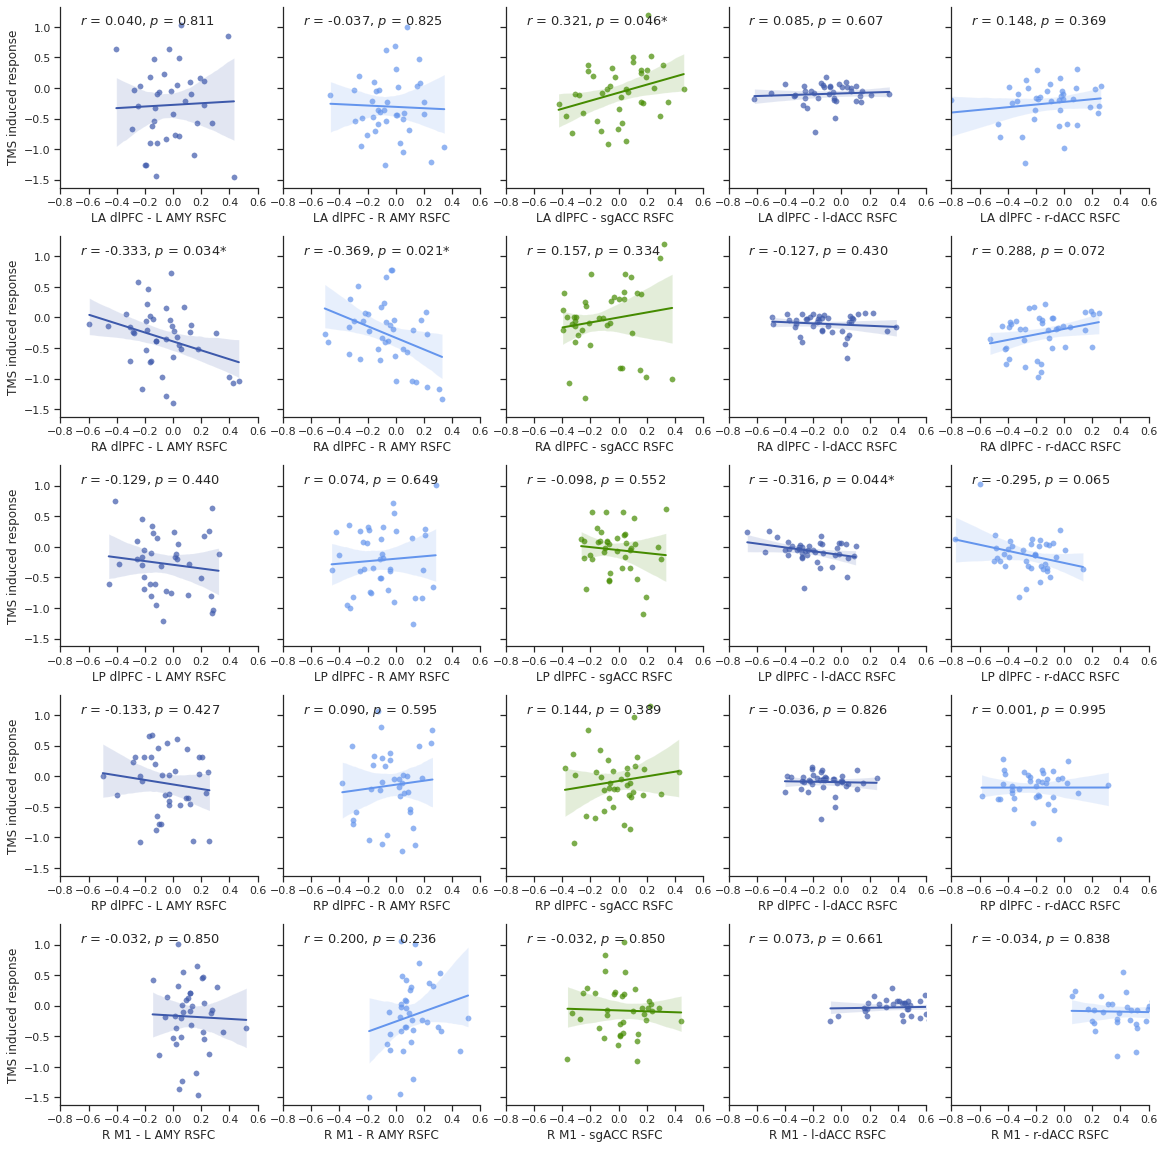

In [79]:
# sns.set_style(style='white')
sns.set_style("ticks")

row_order = ['L_aMFG', 'R_aMFG', 'L_pMFG', 'R_pMFG', 'R_M1']
fig = scatter_plot(plot_data_all, row_order)

x_label_list = ["LA dlPFC", "RA dlPFC", "LP dlPFC", "RP dlPFC", "R M1"]

for row in range(len(x_label_list)):    
    fig.axes[row, 0].set(xlabel = x_label_list[row] + ' - L AMY RSFC', title = '')
    fig.axes[row, 1].set(xlabel = x_label_list[row] + ' - R AMY RSFC', title = '')
    fig.axes[row, 2].set(xlabel = x_label_list[row] + ' - sgACC RSFC', title = '')
    fig.axes[row, 3].set(xlabel = x_label_list[row] + ' - l-dACC RSFC', title = '')
    fig.axes[row, 4].set(xlabel = x_label_list[row] + ' - r-dACC RSFC', title = '')


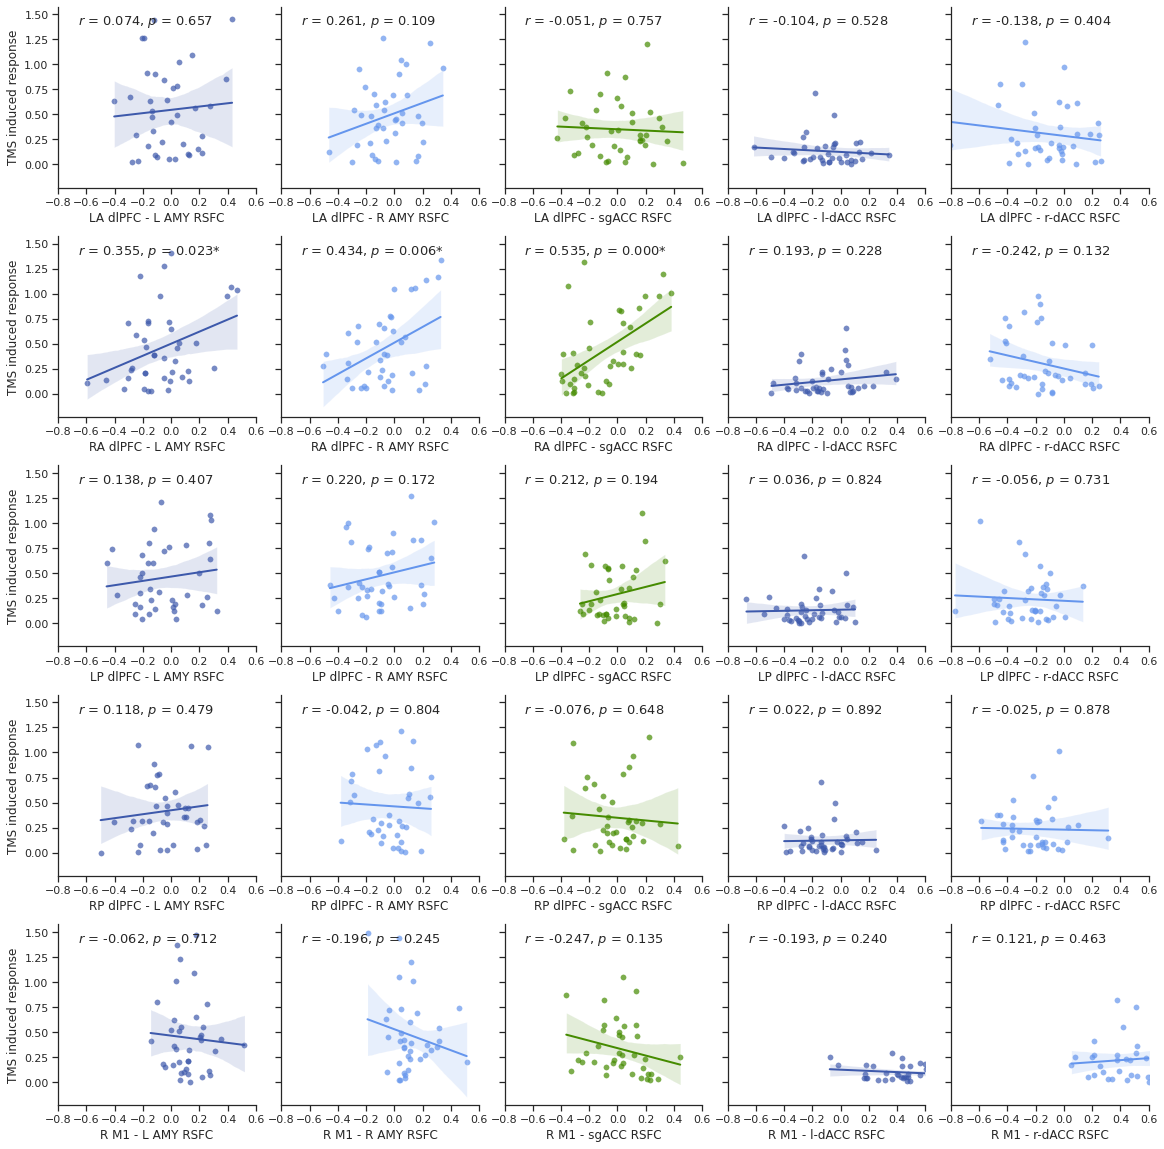

In [80]:
## show absolute connectivities:

# sns.set_style(style='white')
sns.set_style("ticks")

row_order = ['L_aMFG', 'R_aMFG', 'L_pMFG', 'R_pMFG', 'R_M1']

plot_data_all_abs = plot_data_all.copy()
plot_data_all_abs['mean_response'] = abs(plot_data_all['mean_response'])
fig = scatter_plot(plot_data_all_abs, row_order)

x_label_list = ["LA dlPFC", "RA dlPFC", "LP dlPFC", "RP dlPFC", "R M1"]

for row in range(len(x_label_list)):
    fig.axes[row, 0].set(xlabel = x_label_list[row] + ' - L AMY RSFC', title = '')
    fig.axes[row, 1].set(xlabel = x_label_list[row] + ' - R AMY RSFC', title = '')
    fig.axes[row, 2].set(xlabel = x_label_list[row] + ' - sgACC RSFC', title = '')
    fig.axes[row, 3].set(xlabel = x_label_list[row] + ' - l-dACC RSFC', title = '')
    fig.axes[row, 4].set(xlabel = x_label_list[row] + ' - r-dACC RSFC', title = '')


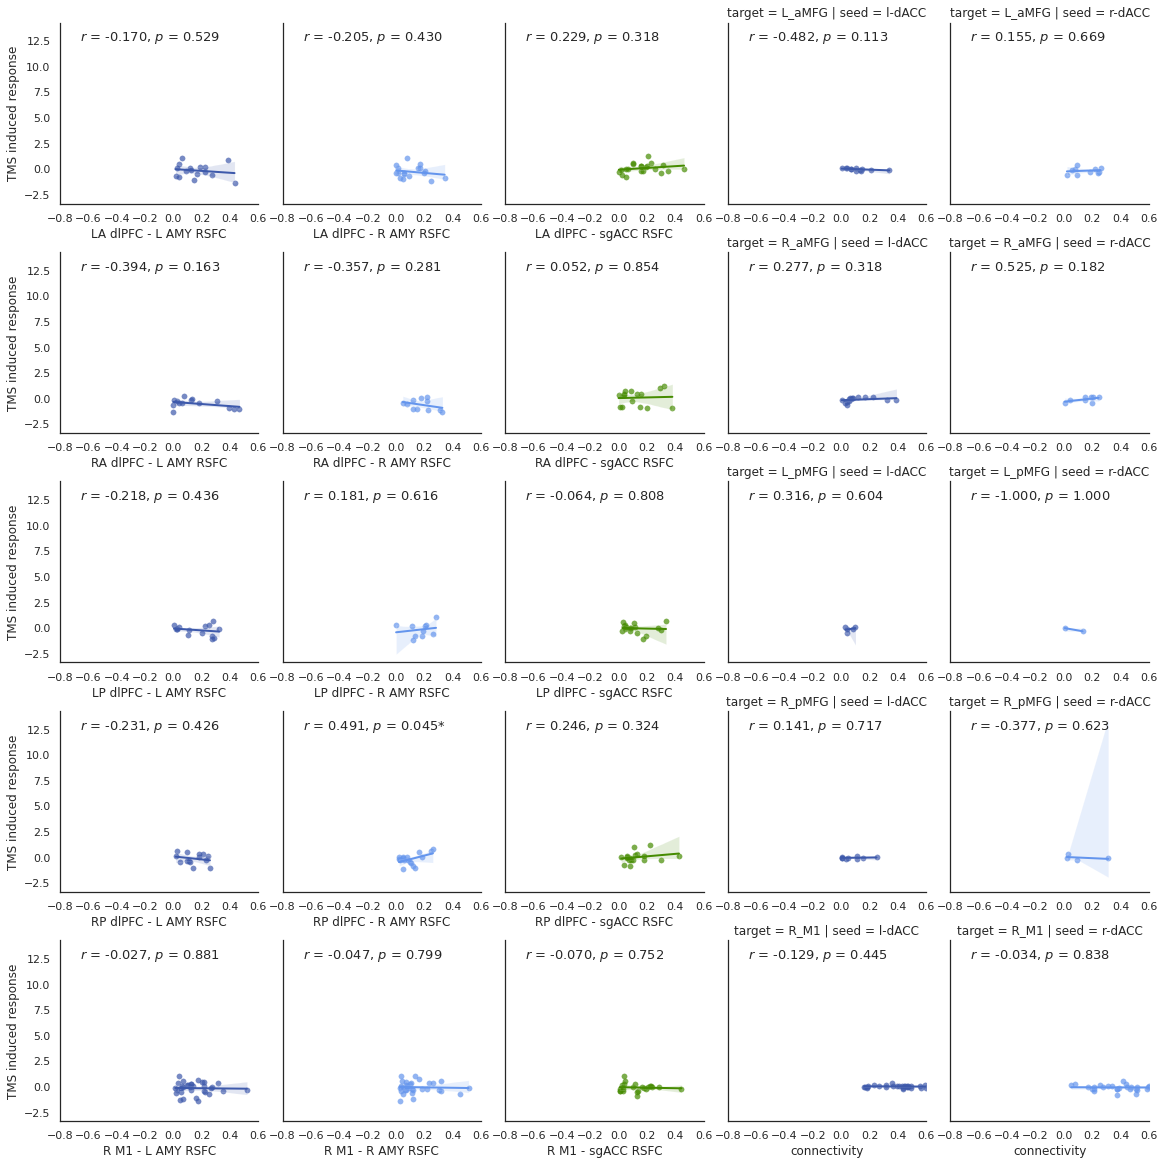

In [81]:
## show positive connectivities:

sns.set_style(style='white')

row_order = ['L_aMFG', 'R_aMFG', 'L_pMFG', 'R_pMFG', 'R_M1']

plot_data_all_pos = plot_data_all.loc[plot_data_all['connectivity'] >=0, :]
fig = scatter_plot(plot_data_all_pos, row_order)

x_label_list = ["LA dlPFC", "RA dlPFC", "LP dlPFC", "RP dlPFC", "R M1"]
for row in range(len(x_label_list)):
    
    fig.axes[row, 0].set(xlabel = x_label_list[row] + ' - L AMY RSFC', title = '')
    fig.axes[row, 1].set(xlabel = x_label_list[row] + ' - R AMY RSFC', title = '')
    fig.axes[row, 2].set(xlabel = x_label_list[row] + ' - sgACC RSFC', title = '')

In [ ]:
## show negative connectivities:

sns.set_style(style='white')

row_order = ['L_aMFG', 'R_aMFG', 'L_pMFG', 'R_pMFG', 'R_M1']

plot_data_all_neg = plot_data_all.loc[plot_data_all['connectivity'] < 0, :]
fig = scatter_plot(plot_data_all_neg, row_order)

x_label_list = ["LA dlPFC", "RA dlPFC", "LP dlPFC", "RP dlPFC", "R M1"]
for row in range(len(x_label_list)):
    
    fig.axes[row, 0].set(xlabel = x_label_list[row] + ' - L AMY RSFC', title = '')
    fig.axes[row, 1].set(xlabel = x_label_list[row] + ' - R AMY RSFC', title = '')
    fig.axes[row, 2].set(xlabel = x_label_list[row] + ' - sgACC RSFC', title = '')

In [ ]:
sns.set_style(style='white')

fig = scatter_plot(plot_data_all.loc[plot_data_all['target'] == 'L_aMFG',:], ['L_aMFG'])

fig.axes[0, 0].set(xlabel = 'RA dlPFC - L AMY RSFC', title = '')
fig.axes[0, 1].set(xlabel = 'RA dlPFC - R AMY RSFC', title = '')
fig.axes[0, 2].set(xlabel = 'RA dlPFC - sgACC RSFC', title = '')


In [ ]:
sns.set_style(style='white')
fig = scatter_plot(plot_data_all.loc[plot_data_all['site'] == 'R_aMFG',:], ['R_aMFG'])

fig.axes[0, 0].set(xlabel = 'RA dlPFC - L AMY RSFC', title = '')
fig.axes[0, 1].set(xlabel = 'RA dlPFC - R AMY RSFC', title = '')
fig.axes[0, 2].set(xlabel = 'RA dlPFC - sgACC RSFC', title = '')


In [ ]:
sns.set_style(style='white')
fig = scatter_plot(plot_data_all.loc[plot_data_all['site'] == 'R_pMFG',:], ['R_pMFG'])

fig.axes[0, 0].set(xlabel = 'RP dlPFC - L AMY RSFC', title = '')
fig.axes[0, 1].set(xlabel = 'RP dlPFC - R AMY RSFC', title = '')
fig.axes[0, 2].set(xlabel = 'RP dlPFC - sgACC RSFC', title = '')


In [ ]:
sns.set_style(style='white')
fig = scatter_plot(plot_data_all.loc[plot_data_all['site'] == 'L_pMFG',:], ['L_pMFG'])

fig.axes[0, 0].set(xlabel = 'LP dlPFC - L AMY RSFC', title = '')
fig.axes[0, 1].set(xlabel = 'LP dlPFC - R AMY RSFC', title = '')
fig.axes[0, 2].set(xlabel = 'LP dlPFC - sgACC RSFC', title = '')
